In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [173]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [174]:
data.shape

(7920, 3)

Data Preprocessing

In [175]:
data.duplicated().sum()

np.int64(0)

In [176]:
data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

Text Preproccesing

In [177]:
import re
import string

Convert uppercase to lowercase

In [178]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [179]:
data

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
...,...,...,...
7915,7916,0,live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,we would like to wish you an amazing day! make...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my #smart #pocket #wifi stay conne...


Remove links

In [180]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [181]:
data

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
...,...,...,...
7915,7916,0,live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,we would like to wish you an amazing day! make...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my #smart #pocket #wifi stay conne...


Remove punctuations

In [182]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [183]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [184]:
data

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...
...,...,...,...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...


Remove numbers


In [185]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [186]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [187]:

!pip install nltk

In [188]:
import nltk

In [189]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [190]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [191]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [192]:

data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [193]:

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [194]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [195]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [196]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [197]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


Building Vocabulary

In [198]:
from collections import Counter
vocab=Counter()

In [199]:
vocab

Counter()

In [200]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [201]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [202]:
len(vocab)

15949

In [203]:
data.shape

(7920, 3)

In [204]:
tokens = [key for key in vocab if vocab[key] > 10]

In [205]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [206]:
len(tokens)

1145

In [207]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [208]:
vocab

Counter({'iphon': 8146,
         'appl': 5752,
         'samsung': 2790,
         'new': 2274,
         'phone': 2030,
         'follow': 1770,
         'soni': 1638,
         '…': 1502,
         'ipad': 1074,
         'rt': 1050,
         'love': 998,
         'like': 910,
         'day': 852,
         'app': 832,
         'life': 830,
         'android': 828,
         'photo': 788,
         'get': 764,
         'io': 764,
         'galaxi': 722,
         'instagram': 716,
         'case': 696,
         'beauti': 644,
         'cute': 644,
         'gain': 622,
         'today': 618,
         'work': 612,
         'im': 588,
         'back': 588,
         'fuck': 586,
         'happi': 586,
         'photographi': 584,
         'game': 564,
         'got': 560,
         'fun': 554,
         'news': 530,
         'thank': 526,
         'music': 526,
         'time': 496,
         'make': 494,
         'updat': 472,
         'smile': 462,
         'instagood': 452,
         'funni': 446

In [209]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

Sploitting the dataset

In [219]:
X=data['tweet']
y=data['label']

In [211]:
!pip install scikit-learn

In [220]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Vectorization

In [221]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [222]:
vectorized_x_train=vectorizer(X_train,tokens)
vectorized_x_test=vectorizer(X_test,tokens)

In [223]:
y_train.value_counts()

label
0    4715
1    1621
Name: count, dtype: int64

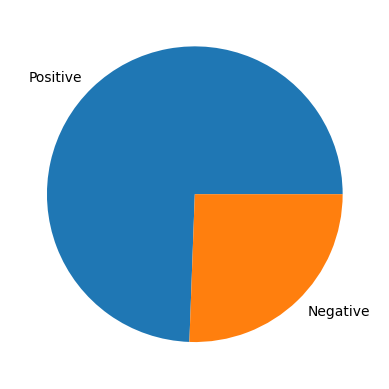

In [224]:

plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Handle imbalanced dataset

In [217]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [225]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9430, 1145) (9430,)


In [228]:
y_train_smote.value_counts()

label
0    4715
1    4715
Name: count, dtype: int64

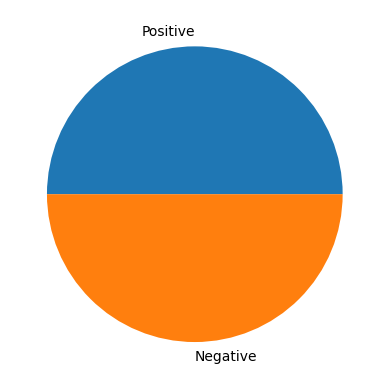

In [230]:

plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [234]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9430, 1145), dtype=float32)

In [236]:
y_train_smote

0       0
1       0
2       1
3       1
4       1
       ..
9425    1
9426    1
9427    1
9428    1
9429    1
Name: label, Length: 9430, dtype: int64

In [238]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [240]:
y_test

3798    1
5515    0
6584    1
2516    0
668     0
       ..
1274    0
7566    0
2752    1
5869    1
7282    0
Name: label, Length: 1584, dtype: int64

Model Training and evaluation